In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics import classification_report
from keras.regularizers import l2
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

ImportError: Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow', [dirname(__file__)])
  File "C:\Users\USER\anaconda3\lib\imp.py", line 296, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\__init__.py", line 66, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 28, in <module>
    _pywrap_tensorflow = swig_import_helper()
  File "C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 20, in swig_import_helper
    import _pywrap_tensorflow
ModuleNotFoundError: No module named '_pywrap_tensorflow'


Failed to load the native TensorFlow runtime.

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/g3doc/get_started/os_setup.md#import_error

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.resize(img,(224,224), interpolation = cv2.INTER_AREA)
            img = img_to_array(img)
            img = preprocess_input(img)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    return images

train=load_images_from_folder('dataset_smoking_notsmoking_splitted/training_data/notsmoking/')+load_images_from_folder('dataset_smoking_notsmoking_splitted/training_data/smoking/')
valid=load_images_from_folder('dataset_smoking_notsmoking_splitted/validation_data/notsmoking/')+load_images_from_folder('dataset_smoking_notsmoking_splitted/validation_data/smoking/')
test=load_images_from_folder('dataset_smoking_notsmoking_splitted/testing_data/notsmoking/')+load_images_from_folder('dataset_smoking_notsmoking_splitted/testing_data/smoking/')

In [4]:
len(train),len(test),len(valid)

(1608, 396, 399)

In [5]:
X_train = np.array(train)
X_test = np.array(test)
X_valid = np.array(valid)
X_train.shape,X_test.shape,X_valid.shape

((1608, 224, 224, 3), (396, 224, 224, 3), (399, 224, 224, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


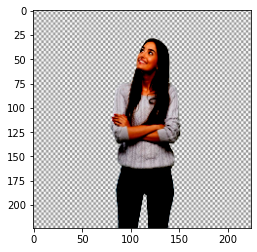

In [6]:
imshow(X_train[803])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


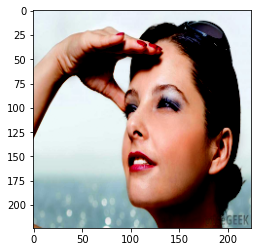

In [7]:
imshow(X_test[197])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


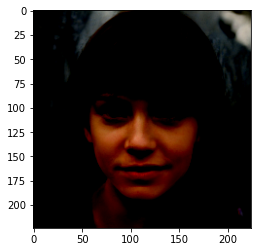

In [8]:
imshow(X_valid[199])

In [9]:
Y_train = np.concatenate((np.zeros((1,804), np.int8).T,np.ones((1,804), np.int8).T)).reshape((-1,1))
Y_test = np.concatenate((np.zeros((1,198), np.int8).T,np.ones((1,198), np.int8).T)).reshape((-1,1))
Y_valid = np.concatenate((np.zeros((1,200), np.int8).T,np.ones((1,199), np.int8).T)).reshape((-1,1))
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("number of validation examples = " + str(X_valid.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
print ("X_valid shape: " + str(X_valid.shape))
print ("Y_valid shape: " + str(Y_valid.shape))

number of training examples = 1608
number of test examples = 396
number of validation examples = 399
X_train shape: (1608, 224, 224, 3)
Y_train shape: (1608, 1)
X_test shape: (396, 224, 224, 3)
Y_test shape: (396, 1)
X_valid shape: (399, 224, 224, 3)
Y_valid shape: (399, 1)


In [10]:
# Shuffle your data here
np.random.seed(10) 
np.random.shuffle(X_train)
np.random.seed(10) 
np.random.shuffle(Y_train)

np.random.seed(20) 
np.random.shuffle(X_test)
np.random.seed(20)
np.random.shuffle(Y_test)

np.random.seed(30) 
np.random.shuffle(X_valid)
np.random.seed(30)
np.random.shuffle(Y_valid)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image shape : (224, 224, 3) 
class: [1]


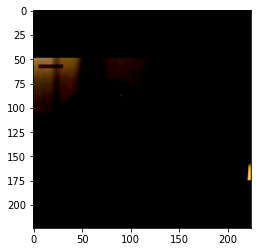

In [11]:
i= 20
print("Image shape :",X_train[i].shape,'\nclass:',Y_train[i])
imshow(X_train[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image shape : (224, 224, 3) 
class: [1]


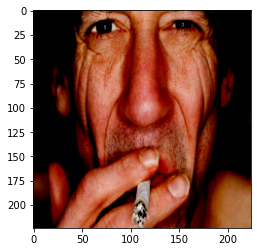

In [12]:
i= 36
print("Image shape :",X_test[i].shape,'\nclass:',Y_test[i])
imshow(X_test[i])

In [13]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [14]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(128, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(1, activation="sigmoid")(headModel)
# model = Model(inputs=baseModel.input, outputs=headModel)
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.25)(headModel)
headModel = Dense(64, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [15]:
LR = 1e-4
EPOCHS = 100
BS = 12
model_store_dir = "smoking_model"

In [16]:
for layer in baseModel.layers:
    layer.trainable = False
opt = Adam(learning_rate=LR, decay=LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

H = model.fit(
    aug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_valid, Y_valid),
    validation_steps=len(X_valid) // BS,
    epochs=EPOCHS)

Epoch 1/100
134/134 [==============================] - 23s 115ms/step - loss: 1.4193 - accuracy: 0.6660 - val_loss: 1.2168 - val_accuracy: 0.8371
Epoch 2/100
134/134 [==============================] - 13s 97ms/step - loss: 1.2011 - accuracy: 0.7848
Epoch 3/100
134/134 [==============================] - 13s 95ms/step - loss: 1.1064 - accuracy: 0.8029
Epoch 4/100
134/134 [==============================] - 15s 110ms/step - loss: 1.0181 - accuracy: 0.8215
Epoch 5/100
134/134 [==============================] - 14s 105ms/step - loss: 0.9411 - accuracy: 0.8476
Epoch 6/100
134/134 [==============================] - 14s 101ms/step - loss: 0.8865 - accuracy: 0.8501
Epoch 7/100
134/134 [==============================] - 13s 99ms/step - loss: 0.8285 - accuracy: 0.8557
Epoch 8/100
134/134 [==============================] - 14s 102ms/step - loss: 0.7790 - accuracy: 0.8582
Epoch 9/100
134/134 [==============================] - 13s 97ms/step - loss: 0.7651 - accuracy: 0.8576
Epoch 10/100
134/134 [====

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396



F:\Files\anaconda\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


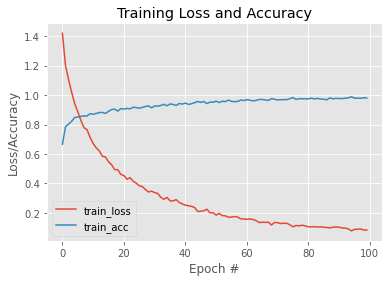

In [17]:
predIdxs = model.predict(X_test, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(Y_test.argmax(axis=1), predIdxs))

model.save(model_store_dir, save_format="h5")
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
# plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('ploy.jpg')

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=32)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

13/13 [==============================] - 1s 42ms/step - loss: 0.2744 - accuracy: 0.9217
Test loss: 0.2744 accuracy: 0.9217


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

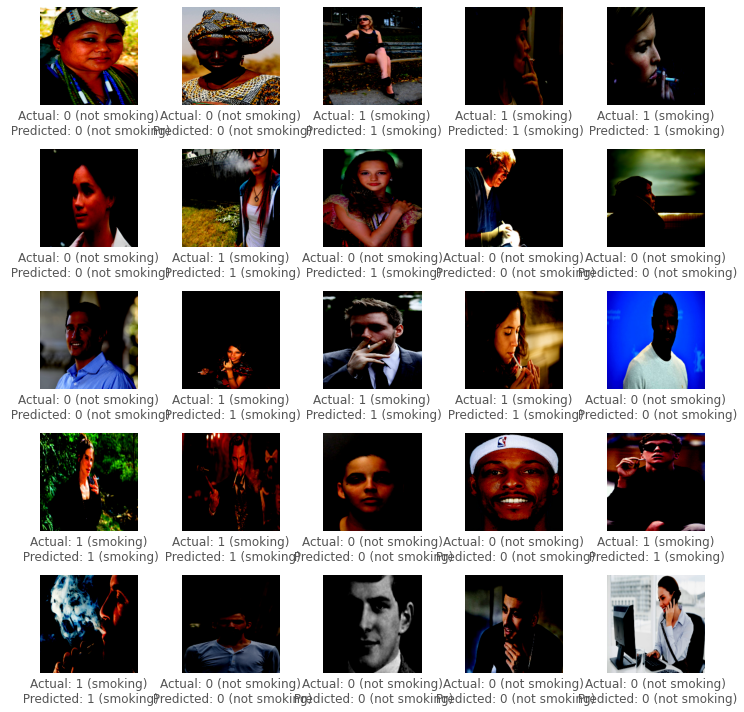

In [19]:
Y_pred=model.predict(X_test)
labels=['not smoking','smoking']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 396) 
    imshow(X_test[img_index])
    
    actual_label = round(Y_test[img_index][0])
    predicted_label = round(Y_pred[img_index][0])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, labels[actual_label], predicted_label, labels[predicted_label]
    ))

plt.tight_layout()
plt.show()

In [36]:
cap = cv2.VideoCapture(0)

while cv2.waitKey(1) != 27:
    has_frame, img = cap.read()
    predicted=[]
    predicted.append(cv2.resize(img, (224,224)))
    if len(predicted)==1:
        pred=model.predict(np.array(predicted)/255)
        cv2.putText(img,str(pred[0][0]),(50,150),cv2.FONT_HERSHEY_COMPLEX,.8,(0,255,0),2)
        if pred[0][0]<0.5:
            cv2.putText(img,'Not smoking',(50,50),cv2.FONT_HERSHEY_COMPLEX,.8,(0,255,0),2)
        else:
            cv2.putText(img,'Smoking',(50,50),cv2.FONT_HERSHEY_COMPLEX,.8,(0,255,0),2)
    cv2.imshow('img', img)
cap.release()
cv2.destroyAllWindows()